# RNN Functional

In [53]:
import glob
import pandas as pd
import tensorflow as tf


from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

import os #Miscellaneous operating system interfaces
#https://docs.python.org/3/library/os.html
#get current working directory
path = os.getcwd() + '\\images\\image_train'
path

model_type = 'Functional'
existing_model = 'RNN'
version = 'v5'
filename = existing_model + '_' +  version
model_path = 'models_output\\' + existing_model + '\\' + version + '\\'

In [54]:
classes = {'10':' Livres, Couvertures de livres ','40':' Jeux videos, CDs + mais aussi equipements, cables, etc. ','50':' Jeux Vidéos, Equipements ','60':' Consoles, Manettes, croix, boutons, ecrans ','1140':' Figurines, Personnages et objets, parfois dans des boites ','1160':' Cartes, Rectangles, beaucoup de couleurs ','1180':' Figurines et boites ','1280':' Jouets, poupées nounours, equipements enfants','1281':' Jeux enfants, Boites et autres, couleurs flashy','1300':' Jeux techniques, Equipement, petites machines ','1301':' Habits bébés, petites photos ','1302':' Equipements, Habits, outils, jouets, objets sur fond blanc','1320':' Matériel et meubles bébé poussettes, habits','1560':' Meubles, matelas canapés lampes, chaises','1920':' Oreillers, coussins, draps','1940':' Alimentations, conserves boites d gateaux','2060':' Décorations','2220':' Equipements divers pour animaux','2280':' Livres et revues anciennes','2403':' Livres et revues de collection','2462':' Equipement jeux, play stations','2522':' Cahiers, carnets, marque pages','2582':' Matériel, meubles et outils pour le jardin','2583':' Equipements technique pour la maison et exterieur (piscines), produits','2585':' Idem 2583:  Equipements technique pour la maison et exterieur (piscines), produits','2705':' Livres','2905':' Jeux vidéos'}

Données textuelles:

In [55]:
X = pd.read_csv(r'C:\Users\Edgar\Documents\Rakuten\X_train_update.csv',index_col =0)
#X = pd.read_csv(r'C:\Users\Edgar\Documents\Rakuten\X_train\X_train_lemma-FR_stop_words-FR_no_num-FR_remove_accents-FR_no_special-FR_lemma-EN_stop_words-EN_stop_words-DE_lemma-DE_steem-FR_steem-EN_steem-DE.csv',index_col =0)
y = pd.read_csv(r'C:\Users\Edgar\Documents\Rakuten\Y_train_CVw08PX.csv',index_col=0).squeeze().map(str)
y

0          10
1        2280
2          50
3        1280
4        2705
         ... 
84911      40
84912    2583
84913    2280
84914    1560
84915    2522
Name: prdtypecode, Length: 84916, dtype: object

In [56]:
#X.rename(columns = {'0':'text'},inplace=True)
#X

In [57]:
X.fillna('',inplace=True)
X['text'] = X.apply(lambda line: line['designation'] + line['description'],axis=1)
X

,designation,description,productid,imageid,text
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,Peluche Donald - Europe - Disneyland 2000 (Mar...
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,La Guerre Des TuquesLuc a des id&eacute;es de ...
...,...,...,...,...,...
84911,The Sims [ Import Anglais ],,206719094,941495734,The Sims [ Import Anglais ]
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,Kit piscine acier NEVADA déco pierre Ø 3.50m x...
84913,Journal Officiel De La Republique Francaise N°...,,440707564,1009325617,Journal Officiel De La Republique Francaise N°...
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,Table Basse Bois De Récupération Massif Base B...


In [58]:
#df_y['label'] = df_y['prdtypecode'].replace(df_y.prdtypecode.unique(), [*range(len(df_y.prdtypecode.unique()))])
#df_y

Nombre de mots par texte:

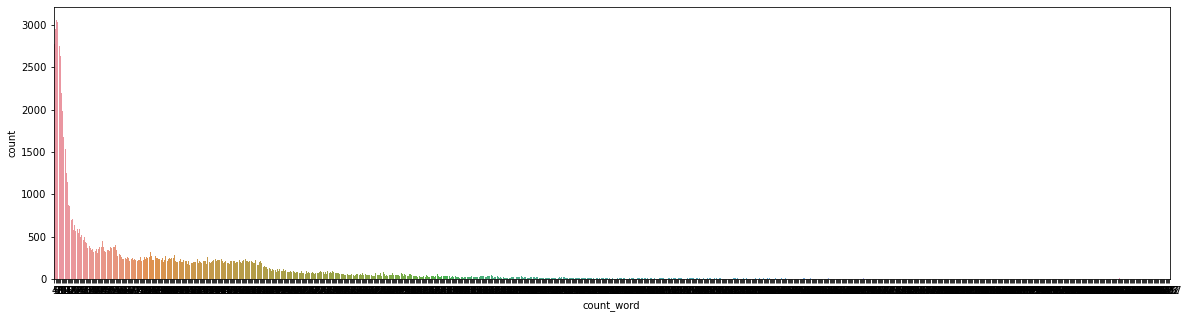

In [59]:
import seaborn as sns
from matplotlib import pyplot

X["count_word"] = X.text.apply(lambda x : len(x.split(' ')))

fig, ax = pyplot.subplots(figsize=(20,5))

sns.countplot(X["count_word"],ax=ax);

Pour éviter des séquences trop longue, le seuil maximum d'une phrase sera considéré à 40:

In [60]:
#df_X = df_X[df_X.count_word<=20]

#df_X["count_word"] = df_X.text.apply(lambda x : len(x.split(' ')))
#fig, ax = pyplot.subplots(figsize=(20,5))

#sns.countplot(df_X["count_word"],ax=ax)

Tokenisation:

In [61]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from nltk.tokenize import word_tokenize

#tfid = TfidfVectorizer(analyzer='word',
#                       tokenizer=word_tokenize,
#                       max_df=0.8,
#                       min_df=2,
#                       #ngram_range=(1,1),
#                       use_idf=True,
#                       smooth_idf=True,                       sublinear_tf=False,
#                       binary=True,
#                       max_features=10000
#                      )

#X = tfid.fit_transform(df_X['text'].squeeze()).todense()

#X.shape

Separer les données en train & text:

In [62]:
# Importer la classe train_test 
from sklearn.model_selection import train_test_split

# Séparer le jeu de données en données d'entraînement et données test 
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

X_train_text

,designation,description,productid,imageid,text,count_word
60735,Carte Postale Typo Aimer - Kiub,Carte postale tendance de la collection Typo d...,2825941333,1208783386,Carte Postale Typo Aimer - KiubCarte postale t...,52
9118,Garçon - Le Jeu De Plateau !,A propos : Il s¿agit d¿un jeu de cartes dans l...,89102802,856119038,Garçon - Le Jeu De Plateau !A propos : Il s¿ag...,66
55855,Royaume Des Animaux Ab À Asc,,197015072,936925976,Royaume Des Animaux Ab À Asc,6
42138,Piscine Jeu Adresse 237x152,0,2824252365,1166755995,Piscine Jeu Adresse 237x1520,4
10948,United States And European Union Auditor Indep...,,418466190,1017775450,United States And European Union Auditor Indep...,8
...,...,...,...,...,...,...
6265,Griottines - Coffret De 5 Cl,Griottines - Coffret de 5 cl Cerises Griottes ...,183256510,938718607,Griottines - Coffret De 5 ClGriottines - Coffr...,103
54886,1bouquet 7 Têtes Artificielles Pivoine Soie Fe...,1Bouquet 7 têtes artificielles Pivoine Soie Fe...,4086048240,1289079205,1bouquet 7 Têtes Artificielles Pivoine Soie Fe...,107
76820,Happy Easter Taies D'oreiller En Lin Coussin S...,Happy Easter taies d&#39;oreiller en lin Couss...,3992621069,1273354395,Happy Easter Taies D'oreiller En Lin Coussin S...,86
860,Pratique Chasse Camo Camping Imperméable Camou...,Pratique Camo chasse furtif étanche Camping Ca...,4231695757,1323296971,Pratique Chasse Camo Camping Imperméable Camou...,219


Tokeniser: texte -> sequence entier (index dans un dictionaire):

In [63]:
import tensorflow as tf
# Définition du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=50000,
                                                )
# Mettre à jour le dictionnaire du tokenizer
tokenizer.fit_on_texts(X_train_text.text)

Stocker le dictionnaire de correspondance:

In [64]:
# Définition des dictionnaires
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words


• Transformer chaque review X_text_train en une séquence d'entiers à l'aide de la méthode texts_to_sequences

In [65]:
X_train = tokenizer.texts_to_sequences(X_train_text.text)

X_test = tokenizer.texts_to_sequences(X_test_text.text)

• Transfomer la liste de sequence X_train en tableau numpy à l'aide de la fonction pad_sequences

In [66]:
maxlen = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')

In [67]:
X_train

array([[  198, 10698, 40528, ...,     0,     0,     0],
       [ 2492,    10,    70, ...,     0,     0,     0],
       [ 3611,    17,   461, ...,     0,     0,     0],
       ...,
       [ 1802,  7702,  1366, ...,     0,     0,     0],
       [  268,  3140,  6942, ...,     0,     0,     0],
       [15137,  5659,   219, ...,     0,     0,     0]])

In [68]:
X_test

array([[  393,  1283,    70, ...,     0,     0,     0],
       [ 3270, 20700,    24, ...,     0,     0,     0],
       [  282,  1850,     9, ...,     0,     0,     0],
       ...,
       [  182,   268,   409, ...,     0,     0,     0],
       [  932,     1,   416, ...,     0,     0,     0],
       [22922,   994, 43185, ...,     0,     0,     0]])

In [69]:
import json 

with open('classes.json') as f:
    categories = json.load(f)

i = 0
y_dict = {}
for category in categories:
    y_train = y_train.replace(category,categories[category])
    y_test = y_test.replace(category,categories[category])
    y_dict[i] = category
    i+=1

In [70]:
# Dataset de notre jeu de données
text_train_set = tf.data.Dataset.from_tensor_slices((X_train,np.array([int(i) for i in y_train.values])))

text_test_set = tf.data.Dataset.from_tensor_slices((X_test,np.array([int(i) for i in y_test.values])))

In [71]:
# Ajouter la fonction load_image dans le pipeline des opérations. Séparer le résultat en lot de taille 32.
text_train_set = text_train_set.map(lambda text, y: [text, y]).batch(32).repeat(-1)
#dataset = dataset.map(lambda x, y: [load_image(x), y[:-1], y[1:]]).batch(16).repeat(-1)

text_test_set = text_test_set.map(lambda text, y: [text, y]).batch(32).repeat(-1)

In [72]:
# Définition d'un générateur python
def generator(text_set):
    iter_text = iter(text_set)
    while True:
        X_text, y_text = next(iter_text) #do not use this 'y_text' from text iterator!!! Tf does not recognise it and leads to bug during training

        yield [X_text], y_text

In [73]:
# Définition du générateur final.
gen_train = generator(text_train_set)

gen_test = generator(text_test_set)

In [74]:
#y_test

### Modèle RNN

In [75]:
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D, RNN, GRUCell, Dense, LSTM, Dropout, GRU
from tensorflow.keras import Model

embedding_dim = 256
voc_size_inp = len(tokenizer.word_counts)+1


text_inputs = Input(shape=(maxlen,), dtype='int32',name='input_' + filename)
x = Embedding(voc_size_inp, embedding_dim, name= 'embed_' + filename)(text_inputs)
#x = GRU(128, return_sequences=True, name='gru_' + filename)(x)
x = GRU(128,return_sequences=True, name = 'GRU_' + filename)(x)
#x = Dense(1024, activation='relu', name='dense_1_' + filename)(x)
x = Dropout(0.3, name='dropout_1' + filename)(x)
x = GlobalAveragePooling1D(name='batchnorm' + filename)(x)
x = Dense(256, activation='relu', name='dense_2_' + filename)(x)
x = Dropout(0.3, name='dropout_2_' + filename)(x)
text_output = Dense(27, activation='softmax', name='output_' + filename)(x)

model = Model(text_inputs, text_output)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_RNN_v5 (InputLayer)    [(None, 500)]             0         
_________________________________________________________________
embed_RNN_v5 (Embedding)     (None, 500, 256)          47877376  
_________________________________________________________________
GRU_RNN_v5 (GRU)             (None, 500, 128)          148224    
_________________________________________________________________
dropout_1RNN_v5 (Dropout)    (None, 500, 128)          0         
_________________________________________________________________
batchnormRNN_v5 (GlobalAvera (None, 128)               0         
_________________________________________________________________
dense_2_RNN_v5 (Dense)       (None, 256)               33024     
_________________________________________________________________
dropout_2_RNN_v5 (Dropout)   (None, 256)               0   

In [76]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [77]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(monitor='val_accuracy',
                                         patience=3,
                                         mode='max',
                                         restore_best_weights=True)


checkpoint = callbacks.ModelCheckpoint(filepath= model_path + filename + '.hdf5', 
                                       monitor='val_accuracy',
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='max',
                                       save_freq='epoch')

red_on_plateau = callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                             patience=2, 
                                             factor=0.1,
                                             verbose=1)

In [78]:
#model.load_weights(model_path + filename + '.hdf5')

model.fit(gen_train, steps_per_epoch=int(len(y_train.values)/32), validation_data = gen_test, validation_steps = int(len(y_test.values)/32),epochs=10,callbacks=[early_stopping, checkpoint,red_on_plateau], workers=1)

Epoch 1/10
2122/2122 [==============================] - 2260s 1s/step - loss: 1.3761 - accuracy: 0.5909 - val_loss: 0.7555 - val_accuracy: 0.7766
Epoch 2/10
2122/2122 [==============================] - 4847s 2s/step - loss: 0.5503 - accuracy: 0.8337 - val_loss: 0.7084 - val_accuracy: 0.7969
Epoch 3/10
2122/2122 [==============================] - 5296s 2s/step - loss: 0.3104 - accuracy: 0.9060 - val_loss: 0.8147 - val_accuracy: 0.7969
Epoch 4/10
2122/2122 [==============================] - 5338s 3s/step - loss: 0.1812 - accuracy: 0.9457 - val_loss: 0.9893 - val_accuracy: 0.7906
Epoch 5/10
2122/2122 [==============================] - 4027s 2s/step - loss: 0.1150 - accuracy: 0.9652 - val_loss: 1.1830 - val_accuracy: 0.7889
Epoch 6/10
2122/2122 [==============================] - 3894s 2s/step - loss: 0.0816 - accuracy: 0.9750 - val_loss: 1.3617 - val_accuracy: 0.7830
Epoch 7/10
2122/2122 [==============================] - 3320s 2s/step - loss: 0.0640 - accuracy: 0.9799 - val_loss: 1.4676 -

In [79]:
#model.load_weights(model_path + filename + '.hdf5')
#history = model.fit(X_train, y_train, batch_size = 32, epochs=30, validation_data = (X_test, y_test),callbacks=[early_stopping, checkpoint,red_on_plateau])

In [80]:
model.save(model_path + filename + '.hdf5')

In [104]:
saved_model = tf.keras.models.load_model(model_path + filename + '.hdf5')
saved_model.load_weights(model_path + filename + '.hdf5')
saved_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_RNN_v5 (InputLayer)    [(None, 500)]             0         
_________________________________________________________________
embed_RNN_v5 (Embedding)     (None, 500, 256)          47877376  
_________________________________________________________________
GRU_RNN_v5 (GRU)             (None, 500, 128)          148224    
_________________________________________________________________
dropout_1RNN_v5 (Dropout)    (None, 500, 128)          0         
_________________________________________________________________
batchnormRNN_v5 (GlobalAvera (None, 128)               0         
_________________________________________________________________
dense_2_RNN_v5 (Dense)       (None, 256)               33024     
_________________________________________________________________
dropout_2_RNN_v5 (Dropout)   (None, 256)               0   

In [105]:
saved_model.weights

[<tf.Variable 'embed_RNN_v5/embeddings:0' shape=(187021, 256) dtype=float32, numpy=
 array([[-0.10386489, -0.61241925, -0.12998658, ..., -0.18311913,
          0.15697382, -0.02893283],
        [-0.16872747,  0.06217104,  0.03072513, ..., -0.18092348,
          0.04992446,  0.04552027],
        [-0.26382196,  0.01885189, -0.21565294, ..., -0.22126052,
          0.091572  ,  0.1874648 ],
        ...,
        [ 0.02167798, -0.01753788, -0.01089334, ...,  0.03785379,
         -0.02413379, -0.04338983],
        [ 0.00304892, -0.00384009,  0.01404243, ..., -0.02110322,
          0.0118622 , -0.01352447],
        [-0.01986842,  0.0332138 , -0.0383917 , ..., -0.04131601,
          0.03131611,  0.01107641]], dtype=float32)>,
 <tf.Variable 'GRU_RNN_v5/gru_cell_6/kernel:0' shape=(256, 384) dtype=float32, numpy=
 array([[-0.31810805, -0.05720047, -0.23684373, ...,  0.324951  ,
          0.06747716,  0.15333605],
        [-0.2569443 , -0.40033776, -0.38524655, ...,  0.04995705,
          0.1112495

In [82]:
y_pred_prob = saved_model.predict(X_test)

In [83]:
y_pred = [y_dict[i] for i in np.argmax(y_pred_prob, axis=1)]
y_test_ = [y_dict[i] for i in y_test]

In [84]:
y_pred #2905,1281,2060

['2905',
 '1280',
 '2060',
 '1302',
 '2403',
 '1300',
 '2280',
 '2583',
 '2060',
 '2705',
 '1302',
 '2582',
 '1140',
 '2585',
 '1320',
 '2582',
 '2280',
 '1281',
 '2585',
 '2583',
 '1281',
 '2060',
 '2220',
 '2403',
 '2403',
 '2060',
 '2522',
 '60',
 '10',
 '1140',
 '1160',
 '2583',
 '1920',
 '1140',
 '1920',
 '50',
 '2905',
 '2060',
 '2403',
 '2522',
 '2705',
 '1560',
 '2522',
 '2403',
 '1140',
 '2403',
 '2582',
 '2583',
 '10',
 '2583',
 '2905',
 '1920',
 '40',
 '1160',
 '10',
 '1560',
 '1560',
 '1180',
 '2583',
 '2583',
 '1300',
 '1180',
 '40',
 '1300',
 '1560',
 '1560',
 '1920',
 '2583',
 '1300',
 '1140',
 '1140',
 '1560',
 '2583',
 '1180',
 '2060',
 '1920',
 '2403',
 '2522',
 '1302',
 '1300',
 '1300',
 '2585',
 '1160',
 '2583',
 '2060',
 '1160',
 '2583',
 '1920',
 '2582',
 '2705',
 '2583',
 '1300',
 '2583',
 '2585',
 '1320',
 '2280',
 '1281',
 '2462',
 '2220',
 '2060',
 '1140',
 '1140',
 '10',
 '2403',
 '1920',
 '2522',
 '2522',
 '2060',
 '2583',
 '2585',
 '1281',
 '1281',
 '1560',

In [85]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(y_test_,y_pred))

              precision    recall  f1-score   support

          10       0.47      0.51      0.49       612
        1140       0.76      0.71      0.73       539
        1160       0.88      0.91      0.89       786
        1180       0.55      0.60      0.57       146
        1280       0.65      0.59      0.62       961
        1281       0.56      0.48      0.52       424
        1300       0.85      0.87      0.86       974
        1301       0.83      0.92      0.87       169
        1302       0.71      0.75      0.73       507
        1320       0.82      0.69      0.75       672
        1560       0.84      0.76      0.80      1013
        1920       0.88      0.89      0.89       841
        1940       0.72      0.86      0.78       137
        2060       0.71      0.81      0.76      1029
        2220       0.62      0.85      0.72       170
        2280       0.83      0.76      0.79       942
        2403       0.68      0.75      0.71       986
        2462       0.76    

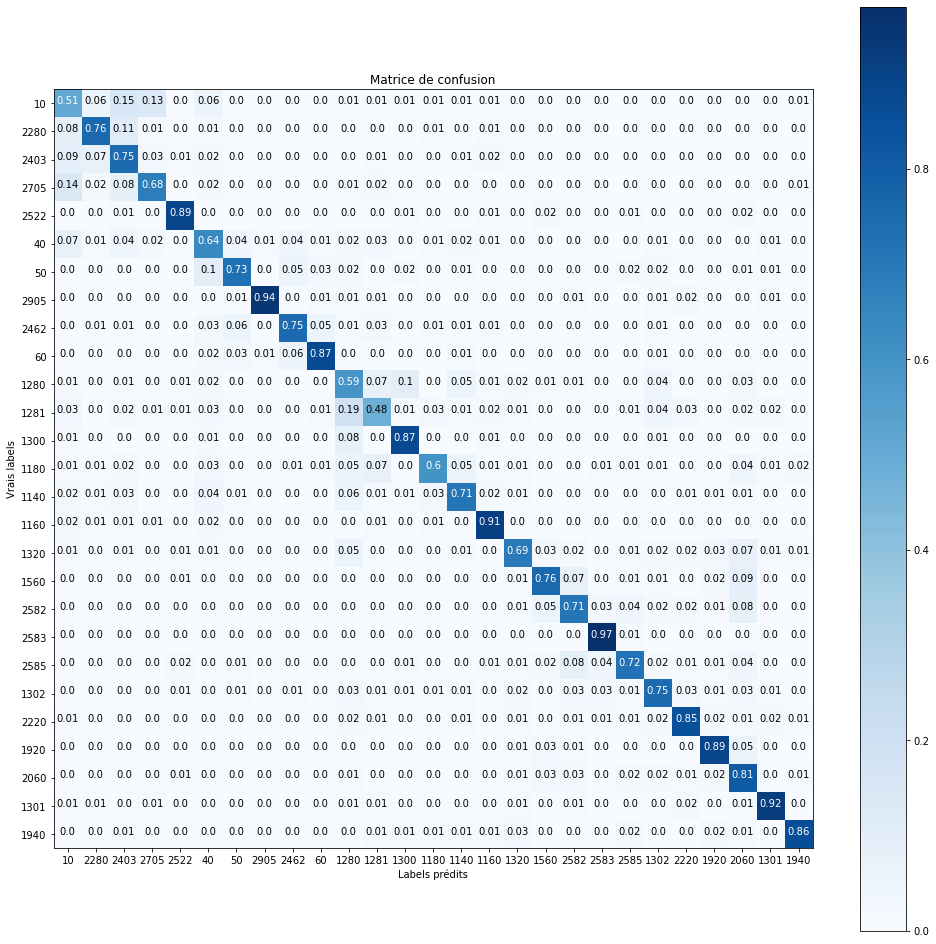

In [86]:
from sklearn import metrics
import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline
import itertools # Pour créer des iterateurs

y_organised = ['10','2280','2403','2705','2522',
               '40','50','2905','2462','60',
               '1280','1281','1300','1180','1140','1160',
               '1320','1560',
               '2582','2583','2585','1302','2220',
               '1920','2060',
               '1301','1940'
              ]

def conf_matx(y_test,y_pred):
    #Réponse valable:
    #cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=list(set(y_pred)))
    cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=y_organised)
    y_organised

    pond_matrix = []
    for line in cnf_matrix:
        pond_line = []
        for cell in line:
            pond_line.append(round(cell/sum(line),2))
        pond_matrix.append(pond_line)
        #print(sum(line))
        #print(sum(pond_line))
    cnf_matrix = np.array(pond_matrix)

    ###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
    #classes = set(y_pred)
    classes = y_organised

    plt.figure(figsize=(17,17))

    plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
    plt.title("Matrice de confusion")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    #tick_marks = set(y_test)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')
    plt.show()
    
conf_matx(y_test_,y_pred)

In [87]:
y_pred_prob = model.predict(X_test)

In [88]:
y_pred = [y_dict[i] for i in np.argmax(y_pred_prob, axis=1)]
y_test_ = [y_dict[i] for i in y_test]

y_pred

['2905',
 '1280',
 '2060',
 '1302',
 '2403',
 '1300',
 '2280',
 '2583',
 '2060',
 '2705',
 '1302',
 '2582',
 '1140',
 '2585',
 '1320',
 '2582',
 '2280',
 '1281',
 '2585',
 '2583',
 '1281',
 '2060',
 '2220',
 '2403',
 '2403',
 '2060',
 '2522',
 '60',
 '10',
 '1140',
 '1160',
 '2583',
 '1920',
 '1140',
 '1920',
 '50',
 '2905',
 '2060',
 '2403',
 '2522',
 '2705',
 '1560',
 '2522',
 '2403',
 '1140',
 '2403',
 '2582',
 '2583',
 '10',
 '2583',
 '2905',
 '1920',
 '40',
 '1160',
 '10',
 '1560',
 '1560',
 '1180',
 '2583',
 '2583',
 '1300',
 '1180',
 '40',
 '1300',
 '1560',
 '1560',
 '1920',
 '2583',
 '1300',
 '1140',
 '1140',
 '1560',
 '2583',
 '1180',
 '2060',
 '1920',
 '2403',
 '2522',
 '1302',
 '1300',
 '1300',
 '2585',
 '1160',
 '2583',
 '2060',
 '1160',
 '2583',
 '1920',
 '2582',
 '2705',
 '2583',
 '1300',
 '2583',
 '2585',
 '1320',
 '2280',
 '1281',
 '2462',
 '2220',
 '2060',
 '1140',
 '1140',
 '10',
 '2403',
 '1920',
 '2522',
 '2522',
 '2060',
 '2583',
 '2585',
 '1281',
 '1281',
 '1560',

In [89]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(y_test_,y_pred))

              precision    recall  f1-score   support

          10       0.47      0.51      0.49       612
        1140       0.76      0.71      0.73       539
        1160       0.88      0.91      0.89       786
        1180       0.55      0.60      0.57       146
        1280       0.65      0.59      0.62       961
        1281       0.56      0.48      0.52       424
        1300       0.85      0.87      0.86       974
        1301       0.83      0.92      0.87       169
        1302       0.71      0.75      0.73       507
        1320       0.82      0.69      0.75       672
        1560       0.84      0.76      0.80      1013
        1920       0.88      0.89      0.89       841
        1940       0.72      0.86      0.78       137
        2060       0.71      0.81      0.76      1029
        2220       0.62      0.85      0.72       170
        2280       0.83      0.76      0.79       942
        2403       0.68      0.75      0.71       986
        2462       0.76    

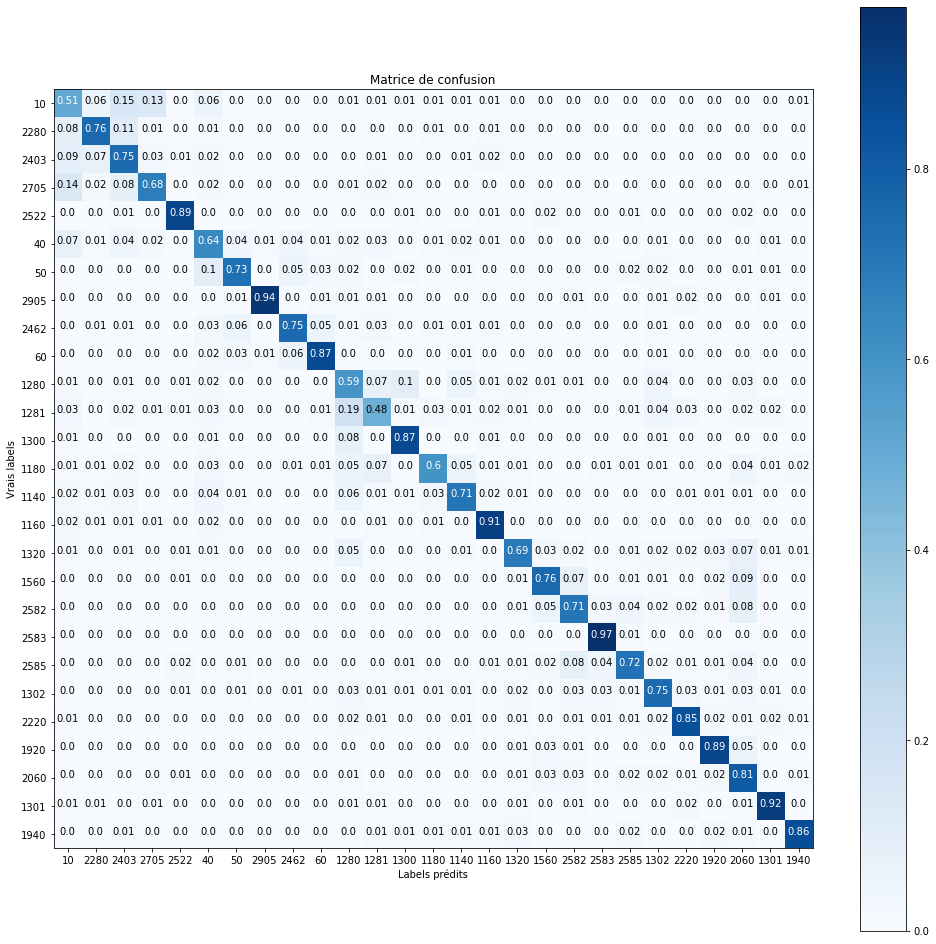

In [90]:
from sklearn import metrics
import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline
import itertools # Pour créer des iterateurs

y_organised = ['10','2280','2403','2705','2522',
               '40','50','2905','2462','60',
               '1280','1281','1300','1180','1140','1160',
               '1320','1560',
               '2582','2583','2585','1302','2220',
               '1920','2060',
               '1301','1940'
              ]

def conf_matx(y_test,y_pred):
    #Réponse valable:
    #cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=list(set(y_pred)))
    cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=y_organised)
    y_organised

    pond_matrix = []
    for line in cnf_matrix:
        pond_line = []
        for cell in line:
            pond_line.append(round(cell/sum(line),2))
        pond_matrix.append(pond_line)
        #print(sum(line))
        #print(sum(pond_line))
    cnf_matrix = np.array(pond_matrix)

    ###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
    #classes = set(y_pred)
    classes = y_organised

    plt.figure(figsize=(17,17))

    plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
    plt.title("Matrice de confusion")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    #tick_marks = set(y_test)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')
    plt.show()
    
conf_matx(y_test_,y_pred)

In [91]:
df_csv = pd.read_csv('predictions.csv',index_col=0)
df_csv

,real,RNN_v3,RNN_v4,EffNetB1_v2,RNN_v3 & EffNetB1_v2,RNN_v4.1,RNN_v6
0,10,NaN,NaN,NaN,NaN,NaN,NaN
1,2280,NaN,NaN,NaN,NaN,NaN,NaN
2,50,NaN,NaN,NaN,NaN,NaN,NaN
3,1280,NaN,NaN,NaN,NaN,NaN,NaN
4,2705,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
84911,40,NaN,NaN,NaN,NaN,NaN,NaN
84912,2583,NaN,NaN,NaN,NaN,NaN,NaN
84913,2280,NaN,NaN,NaN,NaN,NaN,NaN
84914,1560,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
#df_total = pd.DataFrame(index = y.index.to_list())
#df_real = pd.DataFrame(y.to_list(),index = y.index.to_list(),columns = ['real'])
df_pred = pd.DataFrame(y_pred,index = y_test.index.to_list(),columns = [filename])

In [93]:
df = pd.concat([df_csv,df_pred],axis=1)
df

,real,RNN_v3,RNN_v4,EffNetB1_v2,RNN_v3 & EffNetB1_v2,RNN_v4.1,RNN_v6,RNN_v5
0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
84911,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84912,2583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84913,2280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84914,1560,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df.to_csv('predictions.csv')

In [95]:
df.dropna(subset=['RNN_v3','RNN_v4'],inplace=True)

In [96]:
df

,real,RNN_v3,RNN_v4,EffNetB1_v2,RNN_v3 & EffNetB1_v2,RNN_v4.1,RNN_v6,RNN_v5
24,1300,1300.0,1280.0,1302.0,2583.0,1280.0,1300.0,1280
34,40,10.0,1320.0,40.0,2462.0,1320.0,10.0,1940
35,2060,1560.0,2060.0,1560.0,1280.0,2582.0,1560.0,2060
39,2583,2583.0,2583.0,1300.0,1140.0,2583.0,2583.0,2583
75,2280,10.0,40.0,2280.0,1320.0,2705.0,2705.0,1180
...,...,...,...,...,...,...,...,...
84896,10,10.0,10.0,10.0,2280.0,10.0,10.0,10
84900,10,10.0,10.0,10.0,1160.0,10.0,10.0,10
84909,2583,2583.0,2583.0,2583.0,1160.0,2583.0,2583.0,2583
84910,2220,2220.0,2220.0,2220.0,10.0,2220.0,2220.0,2220


In [97]:
new_y_pred = []
for x, y, z in zip(df['real'].to_list(), df['RNN_v3'].to_list(), df['RNN_v4'].to_list()):
    if y == x or z == x:
        new_y_pred.append(str(x))
    else:
        new_y_pred.append(str(z))

In [98]:

print(classification_report(df['real'].map(str).to_list(),new_y_pred))

              precision    recall  f1-score   support

          10       1.00      0.68      0.81       612
        10.0       0.00      0.00      0.00         0
        1140       1.00      0.84      0.91       539
      1140.0       0.00      0.00      0.00         0
        1160       1.00      0.95      0.97       786
      1160.0       0.00      0.00      0.00         0
        1180       1.00      0.66      0.80       146
      1180.0       0.00      0.00      0.00         0
        1280       1.00      0.79      0.88       961
      1280.0       0.00      0.00      0.00         0
        1281       1.00      0.68      0.81       424
      1281.0       0.00      0.00      0.00         0
        1300       1.00      0.97      0.98       974
      1300.0       0.00      0.00      0.00         0
        1301       1.00      0.94      0.97       169
      1301.0       0.00      0.00      0.00         0
        1302       1.00      0.84      0.91       507
      1302.0       0.00    

C:\Users\Edgar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
